In [3]:

# Developing code to coregister the stiched image with digitalized electrode position for further anatomical labelling
import numpy as np
import matplotlib.pyplot as plt
image_path = '/Users/ovinogradov/Documents/Projects/SCN1A/MEA-analysis/data/slice_images/28-11-24/slice1/28-11-24-slice1-fused.tif'
I = plt.imread(image_path)


t_path = '/Users/ovinogradov/Documents/Projects/SCN1A/MEA-analysis/data/templates/MEA256.tif'
template = plt.imread(t_path)

In [13]:
template.shape

(3319, 4018)

In [6]:
def grid_generator(offset_x,
                   offset_y,
                   scale_x,scale_y,size= (3319, 4018)):

    x = na([i for i in range(16) for j in range(16)])
    y = na([j for i in range(16) for j in range(16)])
    img = np.zeros(size = size)
    img[int((x+offset_x)*scale_x),int((y+offset_y)*scale_y)] = 1
    return img


(array([1.289098e+06, 8.794600e+04, 5.054100e+04, 2.207960e+05,
        6.156970e+05, 1.994314e+06, 6.764202e+06, 1.680238e+06,
        6.315340e+05, 1.376000e+03]),
 array([    0. ,  1008.1,  2016.2,  3024.3,  4032.4,  5040.5,  6048.6,
         7056.7,  8064.8,  9072.9, 10081. ]),
 <BarContainer object of 10 artists>)

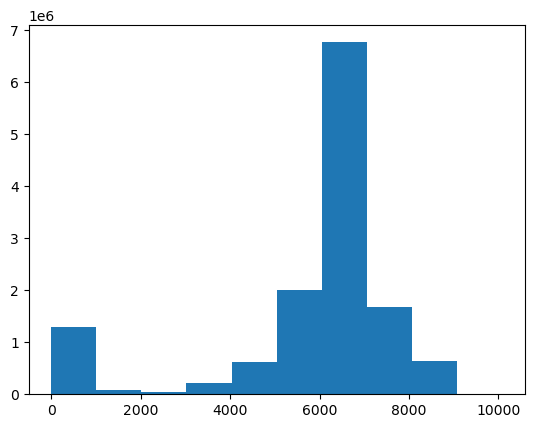

In [15]:
plt.hist(np.hstack(template))

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(t_path)  # Replace with your image path

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold
_, binary_image = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to retain only circular dots
dots = []
structures =[]
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    if area > 10:  # Filter very small noise
        # Circularity = 4π * Area / Perimeter² (ideal circle = 1.0)
        circularity = 4 * np.pi * (area / (perimeter ** 2))
        if 0.7 < circularity <= 1.0:  # Adjust range for "roundness"
            dots.append(contour)

# Find black points (non-zero pixels in the binary image)
# black_points = np.column_stack(np.where(binary_image > 0))

# # Plot the result
# plt.figure(figsize=(8, 8))
# plt.imshow(binary_image, cmap='gray')
# plt.scatter(black_points[:, 1], black_points[:, 0], color='red', s=1, label='Black Points')
# plt.title("Thresholded Image with Detected Points")
# plt.legend()
# plt.show()

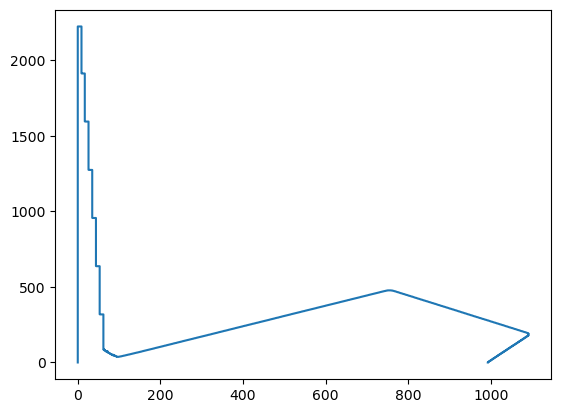

In [104]:
plt.plot(contour[:,0,0],contour[:,0,1])

In [123]:
lines[0].shape

(1843, 1, 2)

/var/folders/x4/6b9j72f910d1lpcfkv5qb37w0000gn/T/ipykernel_17679/3776322432.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


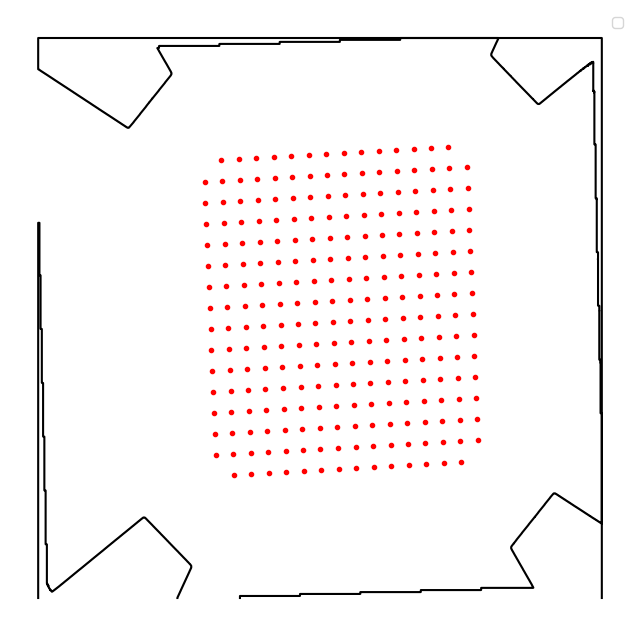

In [126]:
# Filter contours to retain only line-like shapes
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

lines = []
for contour in contours:
    if len(contour)>10:
        x, y, w, h = cv2.boundingRect(contour)  # Get bounding box
        aspect_ratio = max(w / h, h / w)  # Calculate aspect ratio (ensure it's >= 1)
        
        if aspect_ratio > 1.2:  # Filter based on aspect ratio (adjust threshold as needed)
            lines.append(contour)

# Draw filtered lines on the original image
# output_image = image.copy()
# cv2.drawContours(output_image, lines, -1, (0, 255, 0), 2)

# Plot the result
plt.figure(figsize=(8, 8))
# plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

for line in lines:
    plt.plot(line[:,0,0],line[:,0,1],'k')
# plt.title("Filtered Line Contours")
plt.plot([c[0] for c in dot_coordinates], [c[1] for c in dot_coordinates], 'r.')
plt.legend()
# plt.title("Filtered Dots")
# plt.show()
plt.axis('off')
plt.savefig('template_dig.pdf')


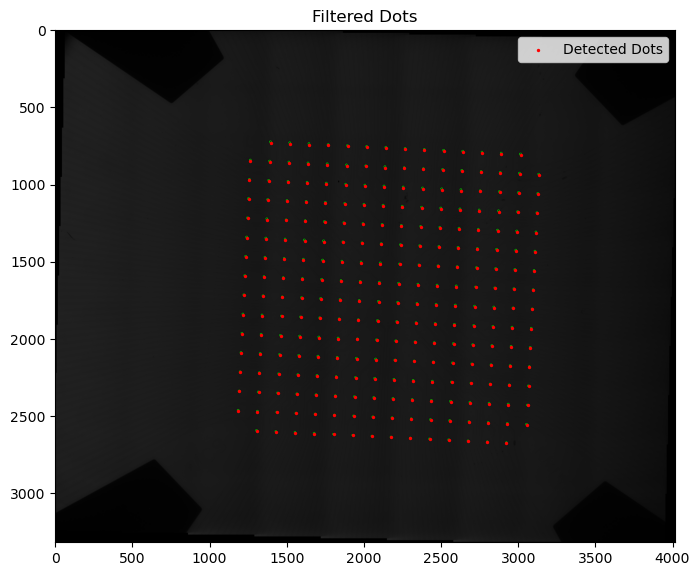

In [80]:
output_image = image.copy()

cv2.drawContours(output_image, dots, -1, (0, 255, 0), 2)

# Extract dot centers for plotting or further processing
dot_centers = [cv2.moments(dot) for dot in dots]
dot_coordinates = [(int(m["m10"] / m["m00"]), int(m["m01"] / m["m00"])) for m in dot_centers if m["m00"] != 0]

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(output_image)
plt.scatter([c[0] for c in dot_coordinates], [c[1] for c in dot_coordinates], color='red', s=2, label='Detected Dots')
plt.legend()
plt.title("Filtered Dots")
plt.show()


In [76]:
len(dot_coordinates)

252

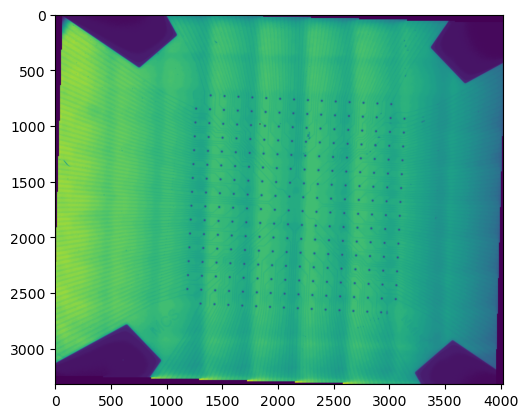

In [58]:
plt.imshow(gray_image)

In [59]:
binary_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(3319, 4018), dtype=uint8)

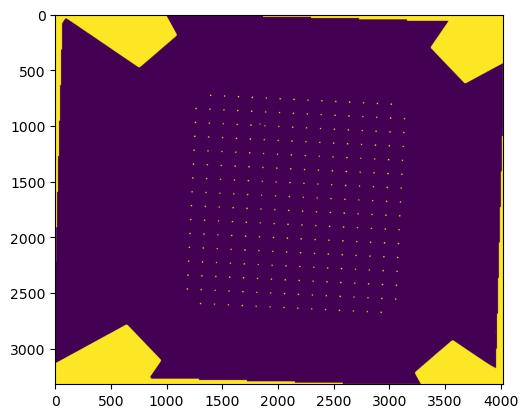

In [60]:
plt.imshow(binary_image)

In [69]:
black_points.shape

(1398855, 2)

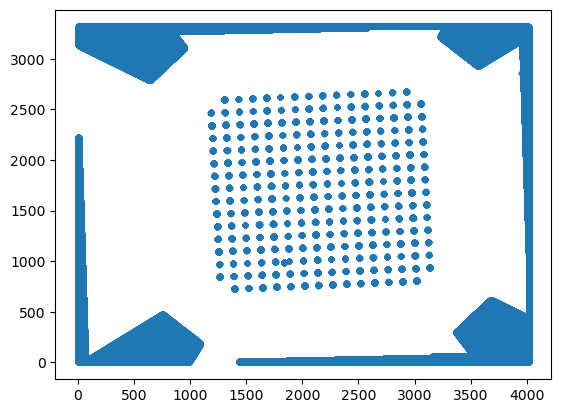

In [68]:
plt.plot(black_points[:, 1], black_points[:, 0], '.')
# plt.savefig('template_dig.pdf')

TypeError: Invalid shape (9278348,) for image data

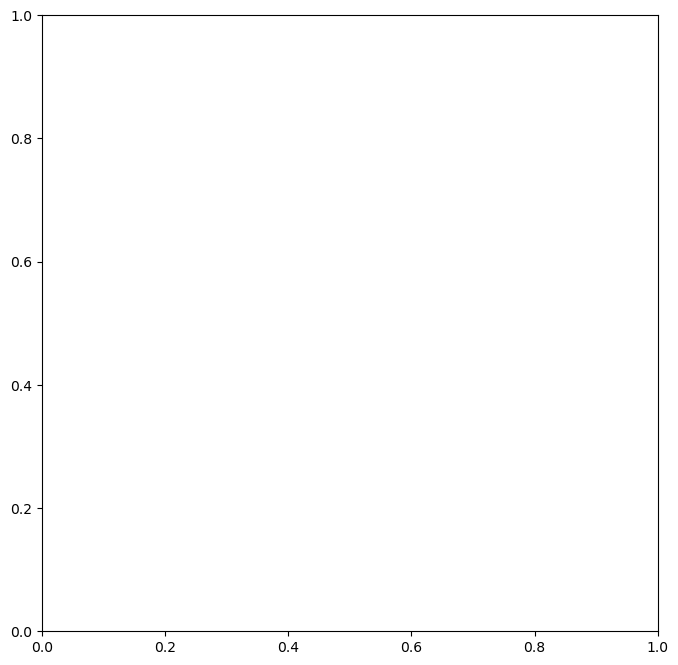

In [17]:
na = np.array
plt.figure(figsize=(8, 8))
plt.imshow(template[template>6000.])#,origin='lower')
# x = na([i for i in range(16) for j in range(16)])
# y = na([j for i in range(16) for j in range(16)])

# # Plot the points

# scale = 
# y_off
# plt.plot(x*108, (y*108)+730,'.k',alpha=0.1)

/Users/ovinogradov/miniconda3/envs/sliceMEA/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


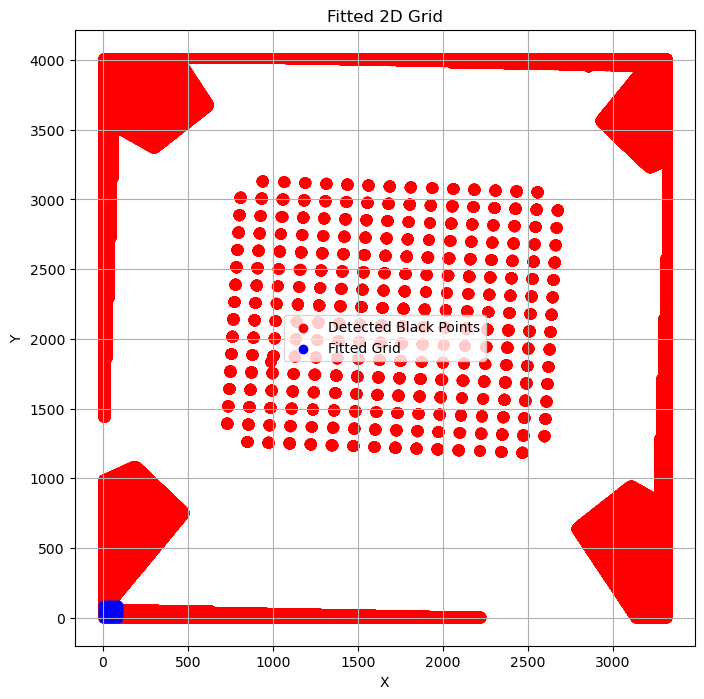

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to model a grid
def grid_function(xy, x_spacing, y_spacing, x_offset, y_offset):
    x, y = xy
    return (x - x_offset) % x_spacing, (y - y_offset) % y_spacing

# Fit the grid to black points
def fit_grid(black_points):
    x_coords, y_coords = black_points[:, 0], black_points[:, 1]
    initial_guess = [10, 10, 0, 0]  # Initial guesses for spacing and offsets

    # Curve fitting for grid alignment
    def error_function(xy, x_spacing, y_spacing, x_offset, y_offset):
        x_residual, y_residual = grid_function(xy, x_spacing, y_spacing, x_offset, y_offset)
        return np.hypot(x_residual, y_residual)

    params, _ = curve_fit(error_function, (x_coords, y_coords), np.zeros(len(x_coords)), p0=initial_guess)
    return params

# Generate grid for visualization
def generate_grid(x_spacing, y_spacing, x_offset, y_offset, image_shape):
    rows, cols = image_shape
    x_ticks = np.arange(x_offset, cols, x_spacing)
    y_ticks = np.arange(y_offset, rows, y_spacing)
    return np.meshgrid(x_ticks, y_ticks)

# Example Usage
# Assuming black_points is a NumPy array of detected black point coordinates [(x1, y1), (x2, y2), ...]
# black_points = np.array([
#     [20, 30], [40, 30], [60, 30],  # Example points in one row
#     [20, 50], [40, 50], [60, 50],  # Example points in another row
# ])

# Fit the grid to the black points
x_spacing, y_spacing, x_offset, y_offset = fit_grid(black_points)

# Generate grid
grid_x, grid_y = generate_grid(x_spacing, y_spacing, x_offset, y_offset, (100, 100))

# Plot the original points and the grid
plt.figure(figsize=(8, 8))
plt.scatter(black_points[:, 0], black_points[:, 1], color='red', label='Detected Black Points')
plt.scatter(grid_x, grid_y, color='blue', label='Fitted Grid')
plt.legend()
plt.title("Fitted 2D Grid")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

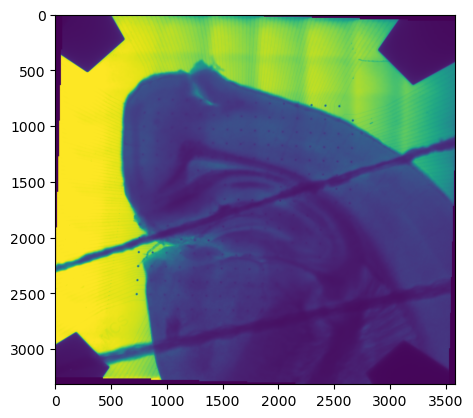

In [9]:
plt.imshow(I)


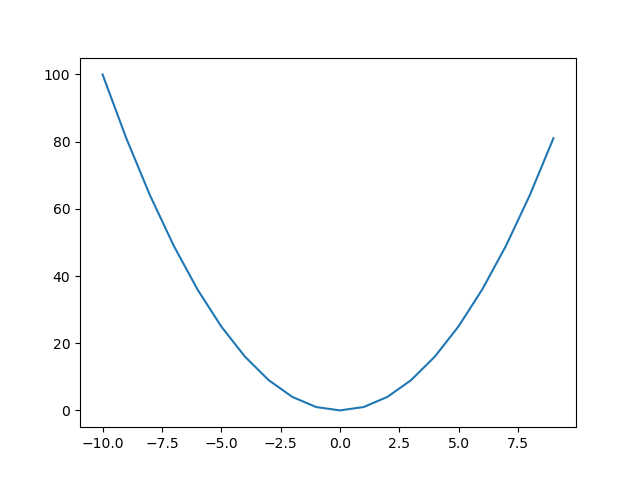

In [2]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10)
y = x**2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

coords = []

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print (f'x = {ix}, y = {iy}')

    global coords
    coords.append((ix, iy))
    
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()



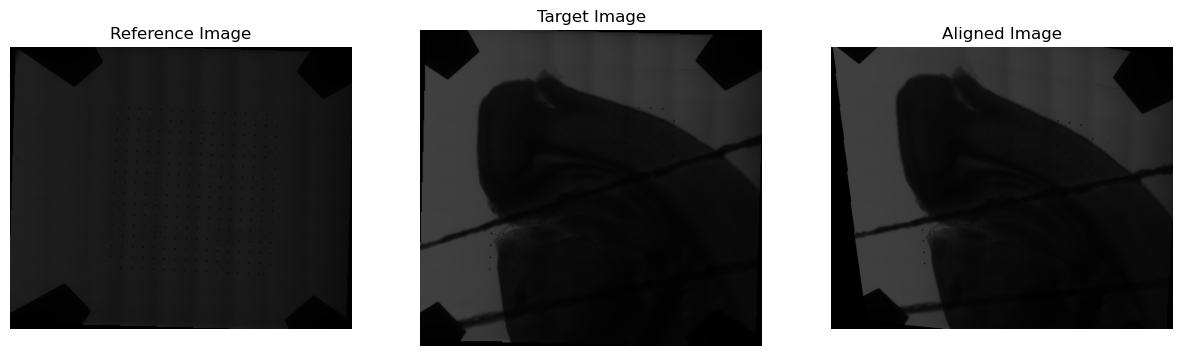

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (reference and target)
image1 = cv2.imread(t_path)  # Reference image
image2 = cv2.imread(image_path)  # Image to align

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
_, gray1 = cv2.threshold(gray1, 5, 255, cv2.THRESH_BINARY_INV)
gray1 = cv2.bitwise_not(gray1)

gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
_, gray2 = cv2.threshold(gray2, 5, 255, cv2.THRESH_BINARY_INV)
gray2 = cv2.bitwise_not(gray2)

# Normalize brightness using histogram equalization

equalized1 = cv2.equalizeHist(gray1)
equalized2 = cv2.equalizeHist(gray2)

# Normalize intensity range to [0, 255] for both images
# normalized1 = cv2.normalize(equalized1, None, 0, 255, cv2.NORM_MINMAX)
# normalized2 = cv2.normalize(equalized2, None, 0, 255, cv2.NORM_MINMAX)

# Detect keypoints and descriptors using ORB
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Match descriptors using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Select the top matches for alignment
good_matches = matches[:50]  # Adjust as needed

# Extract matched keypoints
points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches])
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches])

# Estimate the transformation matrix (homography)
matrix, mask = cv2.findHomography(points2, points1, cv2.RANSAC, 5.0)

# Warp the second image to align with the first
height, width, _ = image1.shape
aligned_image = cv2.warpPerspective(image2, matrix, (width, height))

# Plot the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Reference Image")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Target Image")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Aligned Image")
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

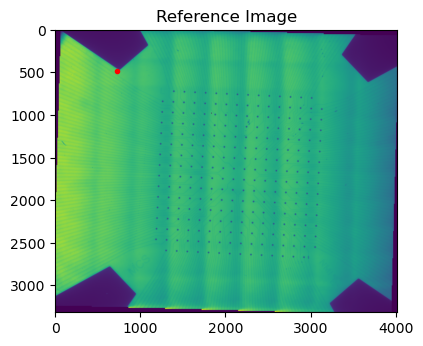

In [21]:
%matplotlib inline
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Reference Image")
plt.imshow(template)

coordinates1 = [730,480]
plt.plot(coordinates1[0],coordinates1[1],'.r')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title("Target Image")
# plt.imshow(I)
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.title("Aligned Image")
# # plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
# # plt.axis('off')


In [11]:
def get_axes():
    fig, axs = plt.subplots(16, 16, figsize=(8, 8),dpi=200)
    letters = ['A','B','C','D','E','F','G','H','J','K','L','M','N','O','P','R']
    # Set the labels for each subplot
    labels = [
        [f"{letters[j]}{i + 1}" for j in range(16)] for i in range(16)
    ]
    # Plot circles with text in each subplot
    ax_dict = {}
    for i in range(16):
        for j in range(16):
            ax = axs[i, j]
            ax.axis('off')
#             circle = patches.Circle((0.5, 0.5), radius=0.4,facecolor=[1,1,1],edgecolor='skyblue')#, color='skyblue')
#             ax.add_patch(circle)
            ax_dict[labels[i][j]] =ax
    return fig, ax_dict


(<Figure size 1600x1600 with 256 Axes>,
 {'A1': <Axes: >,
  'B1': <Axes: >,
  'C1': <Axes: >,
  'D1': <Axes: >,
  'E1': <Axes: >,
  'F1': <Axes: >,
  'G1': <Axes: >,
  'H1': <Axes: >,
  'J1': <Axes: >,
  'K1': <Axes: >,
  'L1': <Axes: >,
  'M1': <Axes: >,
  'N1': <Axes: >,
  'O1': <Axes: >,
  'P1': <Axes: >,
  'R1': <Axes: >,
  'A2': <Axes: >,
  'B2': <Axes: >,
  'C2': <Axes: >,
  'D2': <Axes: >,
  'E2': <Axes: >,
  'F2': <Axes: >,
  'G2': <Axes: >,
  'H2': <Axes: >,
  'J2': <Axes: >,
  'K2': <Axes: >,
  'L2': <Axes: >,
  'M2': <Axes: >,
  'N2': <Axes: >,
  'O2': <Axes: >,
  'P2': <Axes: >,
  'R2': <Axes: >,
  'A3': <Axes: >,
  'B3': <Axes: >,
  'C3': <Axes: >,
  'D3': <Axes: >,
  'E3': <Axes: >,
  'F3': <Axes: >,
  'G3': <Axes: >,
  'H3': <Axes: >,
  'J3': <Axes: >,
  'K3': <Axes: >,
  'L3': <Axes: >,
  'M3': <Axes: >,
  'N3': <Axes: >,
  'O3': <Axes: >,
  'P3': <Axes: >,
  'R3': <Axes: >,
  'A4': <Axes: >,
  'B4': <Axes: >,
  'C4': <Axes: >,
  'D4': <Axes: >,
  'E4': <Axes: >,
  'F4'

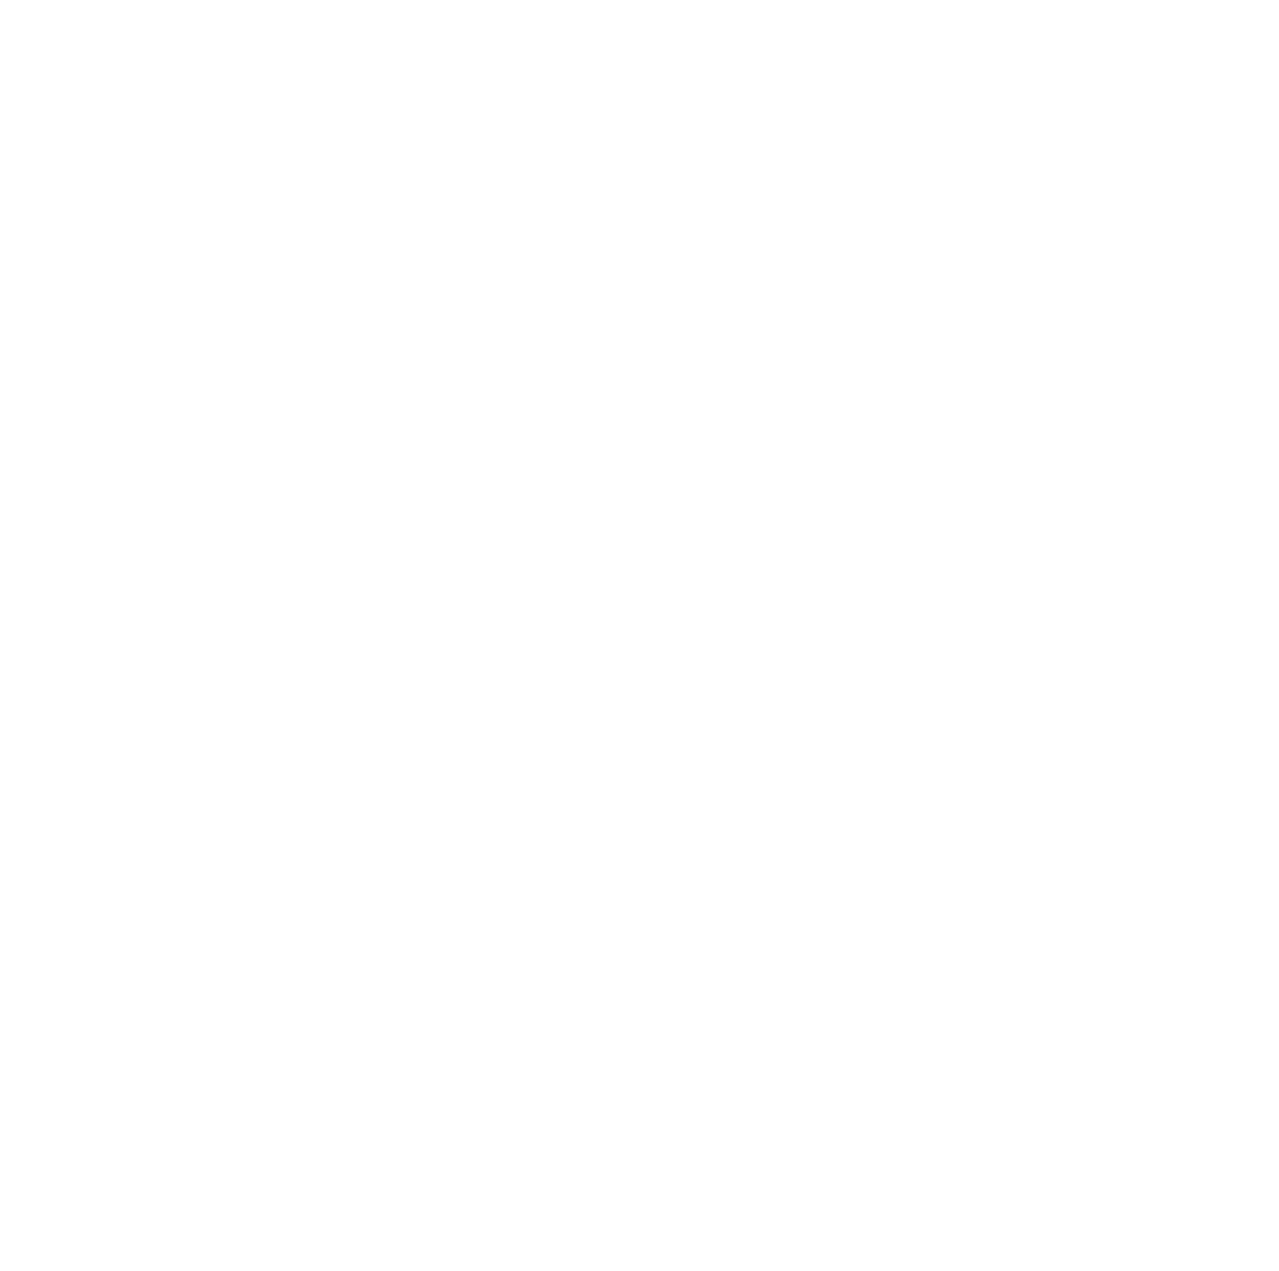

In [12]:
import cv2
import numpy as np

# Load the images
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')

# Manually select corresponding points in both images
# Format: (x, y) coordinates for image1 and image2
points_image1 = np.float32([[100, 100], [200, 100], [100, 200]])  # Example points in image1
points_image2 = np.float32([[150, 150], [250, 150], [150, 250]])  # Corresponding points in image2

# Compute the affine transformation matrix
matrix = cv2.getAffineTransform(points_image1, points_image2)

# Apply the affine transformation to image1
aligned_image = cv2.warpAffine(image1, matrix, (image2.shape[1], image2.shape[0]))

# Show the result
cv2.imshow('Aligned Image', aligned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
